<a href="https://colab.research.google.com/github/eugeinga/CODER-DataScienceIII/blob/main/proyecto_final_ingaramo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA SCIENCE III: NLP, Deep learning y Redes Neuronales Básicas**


![Portada](https://github.com/eugeinga/CODER-DataScienceII/raw/main/IMG/IMG-BannerCODER.jpg)

* **Comisión:** 74560
* **Profesor:** Ezequiel Juan Bassano
* **Tutor:** Federico Gravina
* **Estudiante:** [Eugenia Ingaramo](https://www.linkedin.com/in/eugeniaingaramo/)

# **PROYECTO FINAL: Análisis de reseñas sobre tiendas online de ropa para mujer**

<a id="1"></a>
# <div style="padding:20px;color:yellow;margin:0;font-size:30px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#333333;overflow:hidden"><b>CONTENIDO DEL PROYECTO </b></div>

<div class="toc">
  <ul>
    <li>INTRODUCCIÓN</li>
    <li>OBJETIVOS e HIPÓTESIS</li>
    <li>EL SET DE DATOS</li>
    <li>PRE-PROCESAMIENTO DE DATOS
    <ul>
      <li>Librerías a utilizar</li>
      <li>Carga de Datos</li>
      <li>Data Wrangling
        <ul>
          <li>Valores Duplicados</li>
          <li>Valores Faltantes</li>
          <li>Transformación de datos</li>
        </ul>
      </li>
      <li>Limpieza de texto</li>
      <ul>
          <li>Normalización</li>
          <li>Signos de Puntuación</li>
          <li>Tokenización</li>
          <li>Stopwords</li>
          <li>Steming</li>
          <li>Lematización</li>
        </ul>
    </ul>
    </li>
    <li>ANÁLISIS EXPLORATORIO DE DATOS (EDA)
      <ul>
        <li>Frecuencia de las palabras</li>
        <li>Nubes de palabras y n-gramas</li>
        <li>Análisis de Sentimientos</li>
      </ul>          
    <li>MODELADO
      <ul>
        <li>TF-IDF - Term Frequency-Inverse Document Frequency</li>
        <li>Bag Of Words (BOW)</li>  
      </ul>
    <li>CONCLUSIÓN</li>
    <li>REFERENCIAS</li>
  </ul>
</div>


<a id="1" href="#introduccion"></a>
# <div style="padding:20px;color:yellow;margin:0;font-size:30px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#333333;overflow:hidden"><b>INTRODUCCION </b></div>

![Datset Cover](https://github.com/eugeinga/CODER-DataScienceIII/raw/main/IMG-Indumentaria.jpg)

En el competitivo mundo del e-commerce de indumentaria femenina, entender las opiniones de las clientas es clave para mejorar la experiencia de compra, optimizar el catálogo de productos y aumentar la fidelización. Sin embargo, las reseñas suelen estar en formato texto no estructurado, lo que dificulta su análisis masivo.
Este proyecto busca transformar estas reseñas en información valiosa, identificando patrones de satisfacción e insatisfacción y construyendo un modelo que permita clasificar automáticamente las opiniones como positivas o negativas.

<a id="1"></a>
# <div style="padding:20px;color:yellow;margin:0;font-size:30px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#333333;overflow:hidden"><b>OBJETIVO</b></div>

El presente trabajo tiene por objeto analizar y modelar reseñas de indumentaria femenina para:

* Aplicar técnicas de Procesamiento de Lenguaje Natural (NLP) que permitan extraer insights relevantes.

* Desarrollar un modelo de clasificación supervisado que prediga la polaridad de una reseña (positiva/negativa) a partir de su texto.

<a id="1"></a>
# <div style="padding:20px;color:yellow;margin:0;font-size:30px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#333333;overflow:hidden"><b>EL SET DE DATOS </b></div>

### **◼️ ORIGEN DE LOS DATOS**
----

**Women’s Clothing E-Commerce Reviews**, disponible públicamente en Kaggle:
<https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews>

Este es un conjunto de datos de comercio electrónico de ropa femenina que gira en torno a las reseñas escritas por los clientes.

### **◼️ VARIABLES**
----
Este conjunto de datos incluye 23.486 filas y 10 variables de características. Cada fila corresponde a una reseña de un cliente e incluye las siguientes variables:

* **ID de la prenda:** variable categórica entera que hace referencia a la prenda específica que se reseña.
* **Edad:** variable entera positiva que indica la edad del reseñador.
* **Título:** Variable de cadena para el título de la reseña.
* **Texto de la reseña:** Variable de cadena para el cuerpo de la reseña.
* **Calificación:** Variable entera ordinal positiva para la puntuación del producto otorgada por el cliente, desde 1 (peor) hasta 5 (mejor).
* **IND recomendado:** Variable binaria que indica si el cliente recomienda el producto, donde 1 significa recomendado y 0 no recomendado.
* **Recuento de comentarios positivos:** Número entero positivo que documenta el número de otros clientes que consideraron positiva esta reseña.
* **Nombre de la división:** Nombre categórico de la división de alto nivel del producto.
* **Nombre del departamento:** Nombre categórico del departamento del producto.
* **Nombre de la clase:** Nombre categórico de la clase del producto.


Para la clasificación se crea una variable binaria objetivo "Sentiment":
* 1 (Positivo) = Rating 4 o 5.
* 0 (Negativo) = Rating 1 o 2.

Se excluirán las reseñas con rating 3 (neutral).

<a id="1"></a>
# <div style="padding:20px;color:yellow;margin:0;font-size:30px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#333333;overflow:hidden"><b>PRE-PROCESAMIENTO DE DATOS </b></div>

### **◼️ LIBRERÍAS A UTILIZAR**
----

In [2]:
import pandas as pd                                           # manejo de datos
import numpy as np                                            # manejo de arreglos
import missingno as msno                                      # visualización de datos faltantes
import re                                                     # Para trabajar con expresiones regulares
import chardet                                                # Para identificar el encoding del archivo de datos
import requests                                               # Para salvar limitaciones de acceso a internet del entorno de ejecución

import nltk                                                   # Biblioteca para procesamiento de lenguaje natural - NATURAL LANGUAGE TOOLKIT
nltk.download('punkt')                                        # Descarga el paquete de tokenización de NLTK
nltk.download('punkt_tab')                                    # Descarga el paquete de tokenización de NLTK
nltk.download('stopwords')                                    # Descarga el paquete de stopwords de NLTK
nltk.download('wordnet')                                      # Descarga el paquete de WordNet de NLTK (base de datos léxica para lematización en inglés)
from nltk.corpus import stopwords                             # Para acceder a listas de palabras vacías (stopwords) en distintos idiomas
from nltk.tokenize import word_tokenize                       # Desde el módulo tokenize de NLTK, se importa sólo la función word_tokenize
from nltk.stem import PorterStemmer                           # Desde el módulo stem de NLTK, se importa sólo la función PorterStemmer
from nltk.stem import WordNetLemmatizer                       # Desde el módulo stem de NLTK, se importa sólo la función WordNetLemmatizer

from wordcloud import WordCloud                               # Para trabajar con nubes de palabras
from textblob import TextBlob                                 # Para análisis de sentimientos

from sklearn.feature_extraction.text import CountVectorizer   # Para convertir texto en vectores/matrices de frecuencia (BOW: Bag Of Words)
from sklearn.feature_extraction.text import TfidfVectorizer   # Para generar frecuencias TF-IDF (frecuencia inversa de documentos) y convertir texto en una matriz numérica
from sklearn.model_selection import train_test_split          # Para dividir los datos en entrenamiento y prueba
from sklearn.linear_model import LogisticRegression           # Algoritmo de clasificación binaria
from sklearn.preprocessing import StandardScaler              # Para escalar los datos y mejorar la estabilidad del entrenamiento

from sklearn.metrics import classification_report             # Para calcular las métricas del modelo
from sklearn.metrics import accuracy_score                    # Para calcular qué tan bien predice el modelo en datos nuevos (exactitud). Predicciones correctas / Total de casos.
from sklearn.metrics import precision_score                   # Para calcular el costo de un falso positivo. Proporción de predicciones positivas que son realmente positivas.
from sklearn.metrics import recall_score                      # Para calcular cuántos de los casos positivos reales fueron capturados por el modelo.
from sklearn.metrics import f1_score                          # Para calcular la relación entre precisión y recall.
from sklearn.metrics import confusion_matrix                  # Para calcular la Matriz de Confusión (Muestra los aciertos y errores del modelo organizados por clase)
from sklearn.metrics import roc_auc_score                     # Para calcular qué tan bien el modelo separa las clases.

import matplotlib.pyplot as plt                               # Para crear gráficos y visualizaciones
import seaborn as sns                                         # Para crear gráficos y visualizaciones
#from seaborn import lmplot
#import matplotlib.style as style

#from sklearn.preprocessing import LabelEncoder      # conversión de variables categóricas
#from sklearn.preprocessing import StandardScaler    # escalado de datos
#from sklearn.preprocessing import RobustScaler      # escalado de datos

#import scipy.stats as stats                         # análisis estadístico
#from scipy.stats import shapiro                     # Test estadístico de Normalidad

#import statsmodels.api as sm                        # Gráfico QQ-Plot
#from statsmodels.regression.linear_model import OLS # para análisis de multicolinealidad (VIF)
#from statsmodels.tools.tools import add_constant    # para análisis de multicolinealidad (VIF)

#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestRegressor  # Random Forest
#from sklearn.svm import SVC                         # Support Vector Machine (SVM) para Clasificación
#from sklearn.neighbors import KNeighborsRegressor   # K-Nearest Neighbor (KNN)
#from sklearn.pipeline import Pipeline, make_pipeline
#from sklearn.metrics import classification_report, mean_squared_error
#from sklearn.inspection import permutation_importance

#import statsmodels.api as sm
#from statsmodels.miscmodels.ordinal_model import OrderedModel # Regresión Logística Ordinal

#sns.set_theme(style="whitegrid", palette="pastel") # Estilo de seaborn
#custom_palette = {
#    0: '#ffb482',  # Tipo de vino: RED (type=0) Color Naranja
#    1: '#a1c9f4',  # Tipo de vino: WHITE (type=1) Color Azul
#    'red': '#ffb482',  # Tipo de vino: RED (type=0) Color Naranja
#    'white': '#a1c9f4'  # Tipo de vino: WHITE (type=1) Color Azul
#}

#sns.color_palette("pastel")
#sns.color_palette("pastel").as_hex()
#sns.color_palette(palette='pastel', as_cmap=True)

import warnings                                               # Para tratamiento de errores/alertas
#warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### **◼️ CARGA DE DATOS**
----

Como primera medida, se detecta el encoding del archivo a utilizar con la librería "chardet"

In [3]:
url = "https://raw.githubusercontent.com/eugeinga/CODER-DataScienceIII/main/Womens%20Clothing%20E-Commerce%20Reviews.csv" # Descarga el contenido del archivo desde la URL
response = requests.get(url)
result = chardet.detect(response.content[:10000])                                                                         # Detecta el encoding usando chardet
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


Aunque chardet detectó 'ascii' con alta confianza, ese encoding no es suficiente para leer correctamente el archivo, posiblemente caracteres especiales (como acentos) que no están en el conjunto ASCII. Por lo tanto, haré uso de ISO-8859-1.

In [4]:
# Lectura del dataset con encoding='ISO-8859-1' para evitar errores de lectura cuando el archivo contiene caracteres especiales que no están en ASCII o UTF-8.

url="https://raw.githubusercontent.com/eugeinga/CODER-DataScienceIII/refs/heads/main/Womens%20Clothing%20E-Commerce%20Reviews.csv"
dfReviews=pd.read_csv(url,sep=',',header=0, encoding='ISO-8859-1')
dfReviews.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### **◼️ DATA WRANGLING**
---




El **Data Wrangling** consiste en limpiar, transformar y estructurar los datos para que sean más utilizables y valiosos. Este proceso es esencial porque los datos en su forma original a menudo están desordenados, incompletos o contienen errores que pueden afectar la calidad del análisis.

Como parte de esta etapa se procederá a:
- Identificar valores duplicados
- Identificar valores faltantes
- Transformar datos (normalización, estandarización, etc.).

En este caso se trabaja con un único dataset por lo que no será necesario combinar/concatenar ficheros.

In [5]:
# Información de resumen del dataset
dfReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


El dataset bajo estudio cuenta con 23486 filas y 10 columnas de las cuales 9 corresponden a variables independientes a analizar y 1 a la variable dependiente u objetivo.

In [6]:
# Cardinalidad de las variables

cardinalidad = pd.DataFrame({'Cantidad' : dfReviews.nunique(), 'Porcentaje' : (dfReviews.nunique()) / (dfReviews.shape[0]) * (100)}).round(2)
cardinalidad

,Cantidad,Porcentaje
Unnamed: 0,23486,100.00
Clothing ID,1206,5.13
Age,77,0.33
Title,13993,59.58
Review Text,22634,96.37
Rating,5,0.02
Recommended IND,2,0.01
Positive Feedback Count,82,0.35
Division Name,3,0.01
Department Name,6,0.03


#### **◾ VALORES DUPLICADOS**

##### Se identifican y remueven de los registros duplicados

In [7]:
print("Dimensiones del dataset original: ", dfReviews.shape)
dfReviews.duplicated().value_counts()
dfReviews.drop_duplicates(inplace=True)
print("Dimensiones del dataset sin filas duplicadas: ", dfReviews.shape)

Dimensiones del dataset original:  (23486, 11)
Dimensiones del dataset sin filas duplicadas:  (23486, 11)


El dataset no tiene registros duplicadas que eliminar.

#### **◾ VALORES FALTANTES**

Se identifican los valores nulos en cada una de las columnas del dataset.

In [8]:
# Contabilizo los datos nulos/faltantes por columna.

pd.DataFrame({'Cant.NAN' : dfReviews.isna().sum(), '%NAN' : dfReviews.isna().sum() / len(dfReviews) * (100)}).round(2)

,Cant.NAN,%NAN
Unnamed: 0,0,0.00
Clothing ID,0,0.00
Age,0,0.00
Title,3810,16.22
Review Text,845,3.60
Rating,0,0.00
Recommended IND,0,0.00
Positive Feedback Count,0,0.00
Division Name,14,0.06
Department Name,14,0.06


<Axes: >

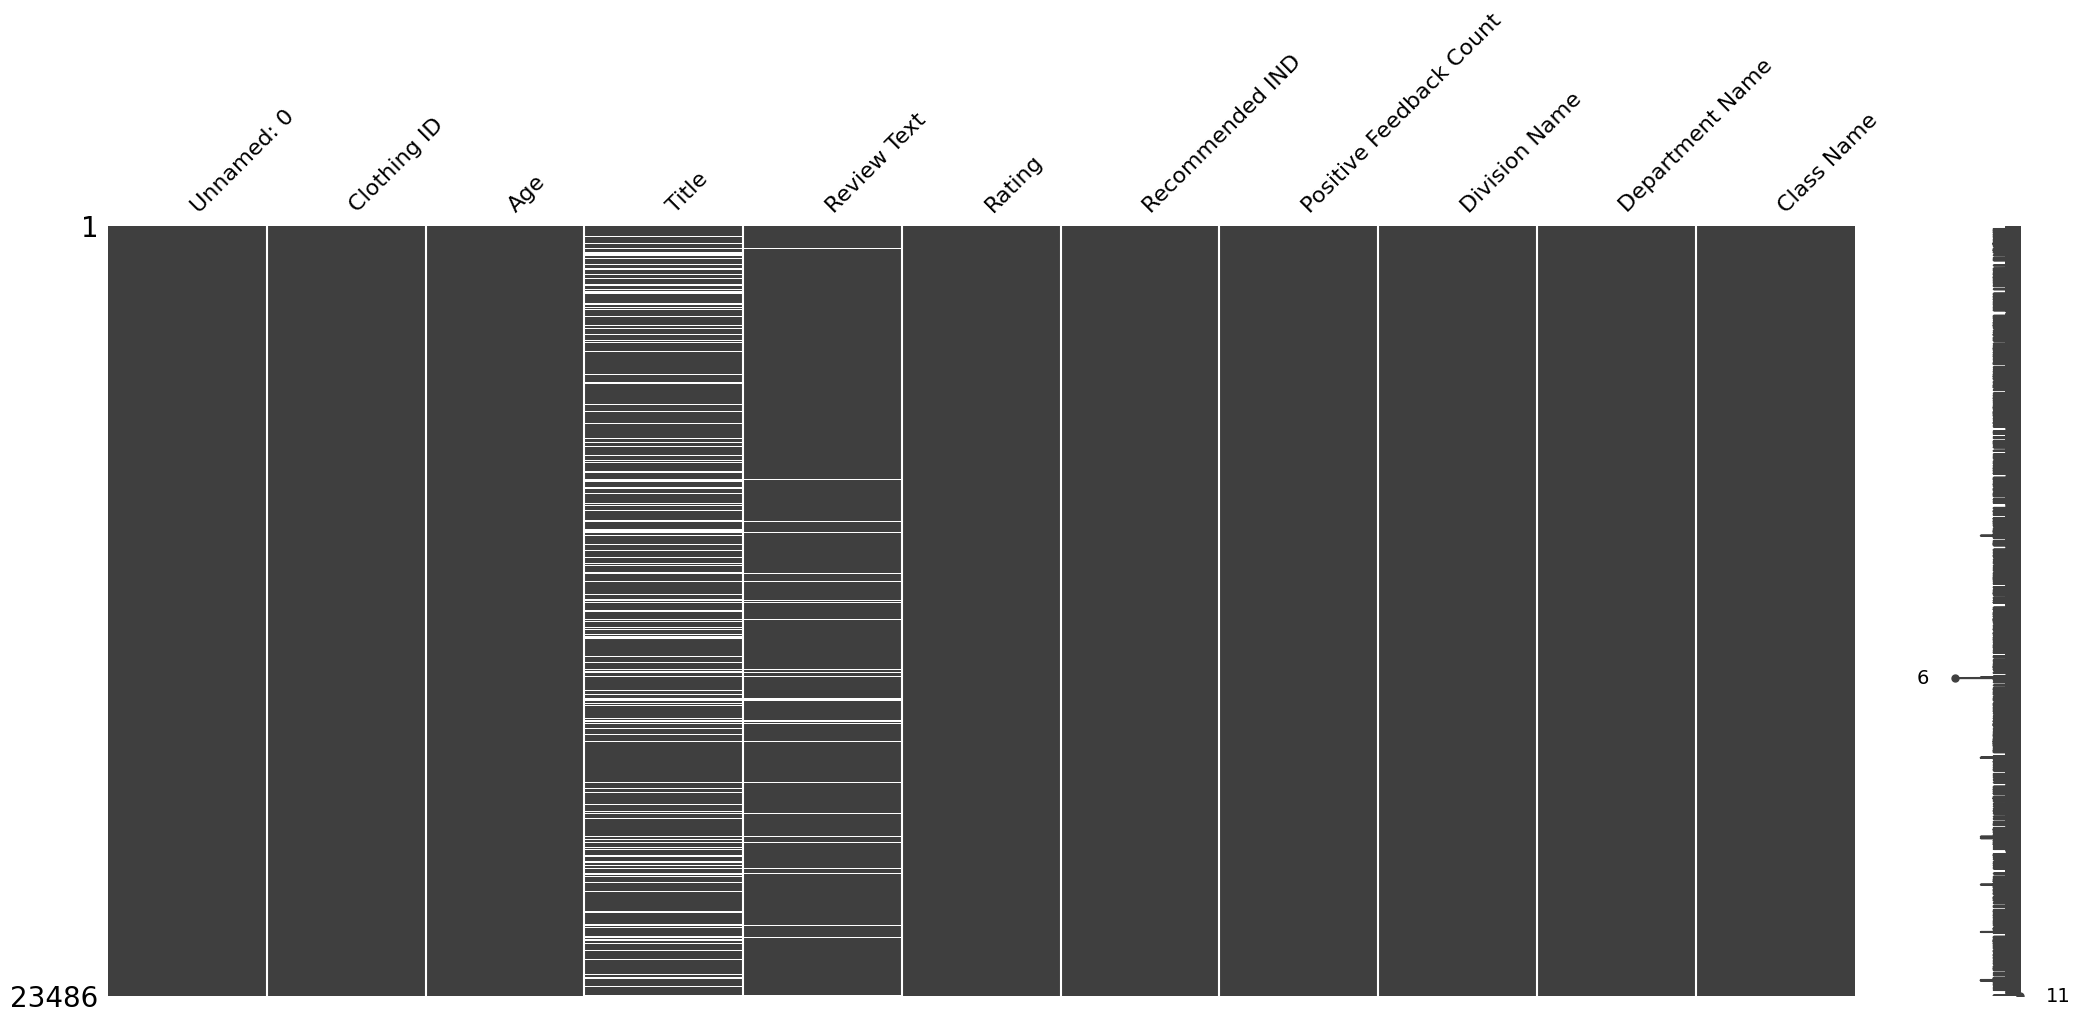

In [10]:
msno.matrix(dfReviews)

Se eliminan los registros donde el campo "Review Text" sea nulo dado que no aportan valor al análisis a realizar.

In [11]:
print("Dimensiones del dataset antes de la remoción de valores faltantes: ", dfReviews.shape)
dfReviews.dropna(subset=['Review Text'], inplace=True)
print("Dimensiones del dataset sin valores faltantes en 'Review Text': ", dfReviews.shape)

Dimensiones del dataset antes de la remoción de valores faltantes:  (23486, 11)
Dimensiones del dataset sin valores faltantes en 'Review Text':  (22641, 11)


Se determina la longitud mínima, máxima y promedio de la variable "Review Text":

In [13]:
dfReviews["review_length"] = dfReviews["Review Text"].apply(len)
#dfReviews["review_length"] = dfReviews["Review Text"].fillna("").apply(len)

max_length = dfReviews["review_length"].max()
min_length = dfReviews["review_length"].min()
avg_length = dfReviews["review_length"].mean()

print(f"Longitud máxima de reseñas: {max_length}")
print(f"Longitud mínima de reseñas: {min_length}")
print(f"Longitud promedio de reseñas: {avg_length:.2f}")

Longitud máxima de reseñas: 508
Longitud mínima de reseñas: 9
Longitud promedio de reseñas: 308.69


#### **◾ TRANSFORMACIÓN DE DATOS**

Como parte del proceso de transformación de datos se crea la variable binaria "Sentiment" a partir de la variable "Rating" asumiendo ratings 4 y 5 como positivos, 1 y 2 como negativos, descartando ratings 3.

In [14]:
df = dfReviews[dfReviews['Rating'] != 3].copy()
df['Sentiment'] = np.where(df['Rating'] >= 4, "Positivo", "Negativo")
df['Sentiment'].value_counts(normalize=True)

,proportion
Sentiment,
Positivo,0.880412
Negativo,0.119588


### **◼️ LIMPIEZA DEL TEXTO**


#### **◾ NORMALIZACIÓN**

Se **normalizan** los valores pasando todo el texto a minúscula:

In [15]:
df['Review_lower'] = df['Review Text'].apply(lambda text: text.lower())

#### **◾ SIGNOS DE PUNTUACIÓN**

Se eliminan **signos de puntuación**:

In [16]:
def remove_punctuation(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)                          # Expresión regular para reemplazar cualquier signo de puntuación o símbolo no alfanumérico

df['Review_puntuacion'] = df['Review_lower'].apply(remove_punctuation)  # Aplicar la función a la columna 'review_lower'

#### **◾ TOKENIZACIÓN**

Se **tokenizan** los valores de la columna "Review Text" para dividir el texto en unidades pequeñas (tokens) a fin de poder trabajar con cada palabra por separado (contar frecuencias, aplicar modelos, buscar significados, etc.)


In [17]:
df['Review_tokenizado'] = df['Review_puntuacion'].apply(word_tokenize)

#### **◾ STOPWORDS**

Se remueven **stopwords**, aquellas  palabras vacías que no aportan un valor significativo al análisis del texto (ej.: artículos, preposiciones, conjunciones y otros términos comunes que suelen ser irrelevantes para tareas de procesamiento de texto) y así mejorar la precisión en el análisis de sentimientos, clasificación de texto y búsqueda de información.

In [18]:
stopwords_eng = stopwords.words('english')    # Para obtener el listado de stopwords en inglés dado que las reseñas están en ese idioma
print(stopwords_eng[:20])                     # Se muestran las primeras 20 stopwords

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


In [19]:
#stop_words = set(stopwords.words('english'))  # Se crea una lista de stopwords en inglés usando NLTK
stop_words = list(stopwords.words('english'))  # Se crea una lista de stopwords en inglés usando NLTK

# Se define una función lamda para eliminar stopwords en cada fila de la columna 'Review_tokenizado'
df['Review_tokenizado_sin_stopwords'] = df['Review_tokenizado'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

A fin de reducir la variabilidad de las palabras y facilitando el análisis del texto se procede a realizar el steming y lematización de las palabras del campo "Rreview Text"

#### **◾ STEMMING**

Se realiza el **stemming** de las palabras para reducirlas a su raíz o forma base eliminando los sufijos de cada palabra.

In [20]:
stemmer = PorterStemmer()   # Se inicializa el stemmer
df['Review_stemming'] = df['Review_tokenizado_sin_stopwords'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])  # Se aplica stemming a la columna 'Review_tokenizado_sin_stopwords'

#### **◾ LEMATIZACIÓN**

Se realiza la **lematización** de las palabras a fin de reducirlas a su lema (forma base), manteniendo el significado gramatical correcto de las palabras.

In [21]:
lemmatizer = WordNetLemmatizer()  # Se inicializa el lematizador
df['Review_lematizacion'] = df['Review_tokenizado_sin_stopwords'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens]) # Se aplica la lematización a la columna 'Review_tokenizado_sin_stopwords'

Se previsualizan las columnas generadas como parte del proceso de limpieza del texto:

In [22]:
pd.set_option('display.max_colwidth', None) # Para configurar pandas para mostrar el contenido completo de las columnas
df[["Review Text", "Review_lower", "Review_puntuacion", "Review_tokenizado", "Review_tokenizado_sin_stopwords", "Review_stemming", "Review_lematizacion"]].head(5)

,Review Text,Review_lower,Review_puntuacion,Review_tokenizado,Review_tokenizado_sin_stopwords,Review_stemming,Review_lematizacion
0,Absolutely wonderful - silky and sexy and comfortable,absolutely wonderful - silky and sexy and comfortable,absolutely wonderful silky and sexy and comfortable,"[absolutely, wonderful, silky, and, sexy, and, comfortable]","[absolutely, wonderful, silky, sexy, comfortable]","[absolut, wonder, silki, sexi, comfort]","[absolutely, wonderful, silky, sexy, comfortable]"
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.","love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",love this dress its sooo pretty i happened to find it in a store and im glad i did bc i never would have ordered it online bc its petite i bought a petite and am 58 i love the length on me hits just a little below the knee would definitely be a true midi on someone who is truly petite,"[love, this, dress, its, sooo, pretty, i, happened, to, find, it, in, a, store, and, im, glad, i, did, bc, i, never, would, have, ordered, it, online, bc, its, petite, i, bought, a, petite, and, am, 58, i, love, the, length, on, me, hits, just, a, little, below, the, knee, would, definitely, be, a, true, midi, on, someone, who, is, truly, petite]","[love, dress, sooo, pretty, happened, find, store, im, glad, bc, never, would, ordered, online, bc, petite, bought, petite, 58, love, length, hits, little, knee, would, definitely, true, midi, someone, truly, petite]","[love, dress, sooo, pretti, happen, find, store, im, glad, bc, never, would, order, onlin, bc, petit, bought, petit, 58, love, length, hit, littl, knee, would, definit, true, midi, someon, truli, petit]","[love, dress, sooo, pretty, happened, find, store, im, glad, bc, never, would, ordered, online, bc, petite, bought, petite, 58, love, length, hit, little, knee, would, definitely, true, midi, someone, truly, petite]"
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!","i love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",i love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments,"[i, love, love, love, this, jumpsuit, its, fun, flirty, and, fabulous, every, time, i, wear, it, i, get, nothing, but, great, compliments]","[love, love, love, jumpsuit, fun, flirty, fabulous, every, time, wear, get, nothing, great, compliments]","[love, love, love, jumpsuit, fun, flirti, fabul, everi, time, wear, get, noth, great, compliment]","[love, love, love, jumpsuit, fun, flirty, fabulous, every, time, wear, get, nothing, great, compliment]"
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,this shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt,"[this, shirt, is, very, flattering, to, all, due, to, the, adjustable, front, tie, it, is, the, perfect, length, to, wear, with, leggings, and, it, is, sleeveless, so, it, pairs, well, with, any, cardigan, love, 

In [23]:
pd.reset_option('display.max_colwidth')     # Restaura la configuración predeterminada de pandas para el ancho de las columnas

<a id="1"></a>
# <div style="padding:20px;color:yellow;margin:0;font-size:30px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#333333;overflow:hidden"><b>ANÁLISIS EXPLORATORIO DE DATOS </b></div>

Se realiza un **Análisis Exploratorio de Datos** específico para NLP.

Como parte de esta etapa se procederá a:
- Analizar la frecuencia de las palabras y n-gramas.
- Generar nubes de palabras.
- Identificar la distribución de longitudes por clase.
- Identificar palabras distintivas en cada clase.

### **◼️ FRECUENCIA DE PALABRAS**
----

Se obtiene el listado de las palabras con mayor frecuencia:

In [24]:
from collections import Counter

tokens_lematizados = [token for tokens_list in df['Review_lematizacion'] for token in tokens_list]  # Se unen todos los tokens lematizados en una sola lista
frecuencia_palabras_lematizadas = Counter(tokens_lematizados)                                       # Se contabiliza la frecuencia de aparición de cada palabra
frecuencia_palabras_lematizadas.most_common(20)                                                     # Se muestran las 20 palabras más frecuentes

[('dress', 9852),
 ('fit', 8920),
 ('size', 8240),
 ('love', 8216),
 ('top', 7030),
 ('color', 6104),
 ('wear', 5904),
 ('like', 5891),
 ('look', 5853),
 ('great', 5646),
 ('im', 5206),
 ('would', 4040),
 ('fabric', 4018),
 ('small', 3898),
 ('perfect', 3592),
 ('little', 3384),
 ('one', 3280),
 ('really', 3278),
 ('ordered', 3256),
 ('flattering', 3152)]

Se grafica la distribución de frecuencia de las palabras más frecuentes para las palabras Lematizadas y las Originales

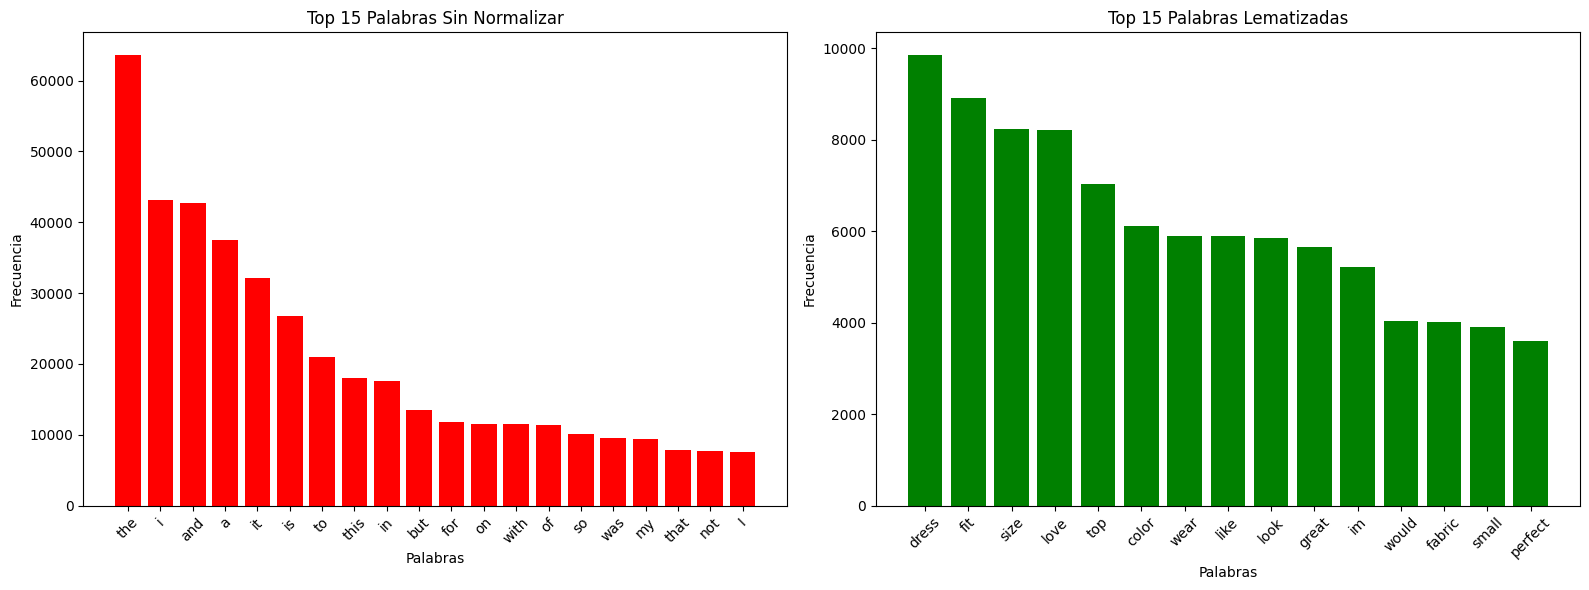

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # 1 fila, 2 columnas

tokens_sin_normalizar = [token for review in df['Review Text'] for token in review.split()]   # Tokenización sin normalización previa (sin pasar a minúsculas, sin quitar puntuación)
frecuencia_sin_normalizar = Counter(tokens_sin_normalizar)                                    # Se cuenta la frecuencia de cada palabra
palabras_sin_norm, frecuencias_sin_norm = zip(*frecuencia_sin_normalizar.most_common(20))     # Se obtienen las 15 palabras más comunes y sus frecuencias
# Gráfica de tokenización sin normalización previa (derecha)
axs[0].bar(palabras_sin_norm, frecuencias_sin_norm, color='red')
axs[0].set_title('Top 15 Palabras Sin Normalizar')
axs[0].set_xlabel('Palabras')
axs[0].set_ylabel('Frecuencia')
axs[0].tick_params(axis='x', rotation=45)

palabras_lem, frecuencias_lem = zip(*frecuencia_palabras_lematizadas.most_common(15)) # Se obtienen las 15 palabras más comunes y sus frecuencias
# Gráfica de tokenización sobre el texto lematizado (izquierda)
axs[1].bar(palabras_lem, frecuencias_lem, color='green')
axs[1].set_title('Top 15 Palabras Lematizadas')
axs[1].set_xlabel('Palabras')
axs[1].set_ylabel('Frecuencia')
axs[1].tick_params(axis='x', rotation=45)


plt.tight_layout()  # Ajusta diseño para evitar superposición
plt.show()


### **◼️ NUBE DE PALABRAS Y N-GRAMAS**
----

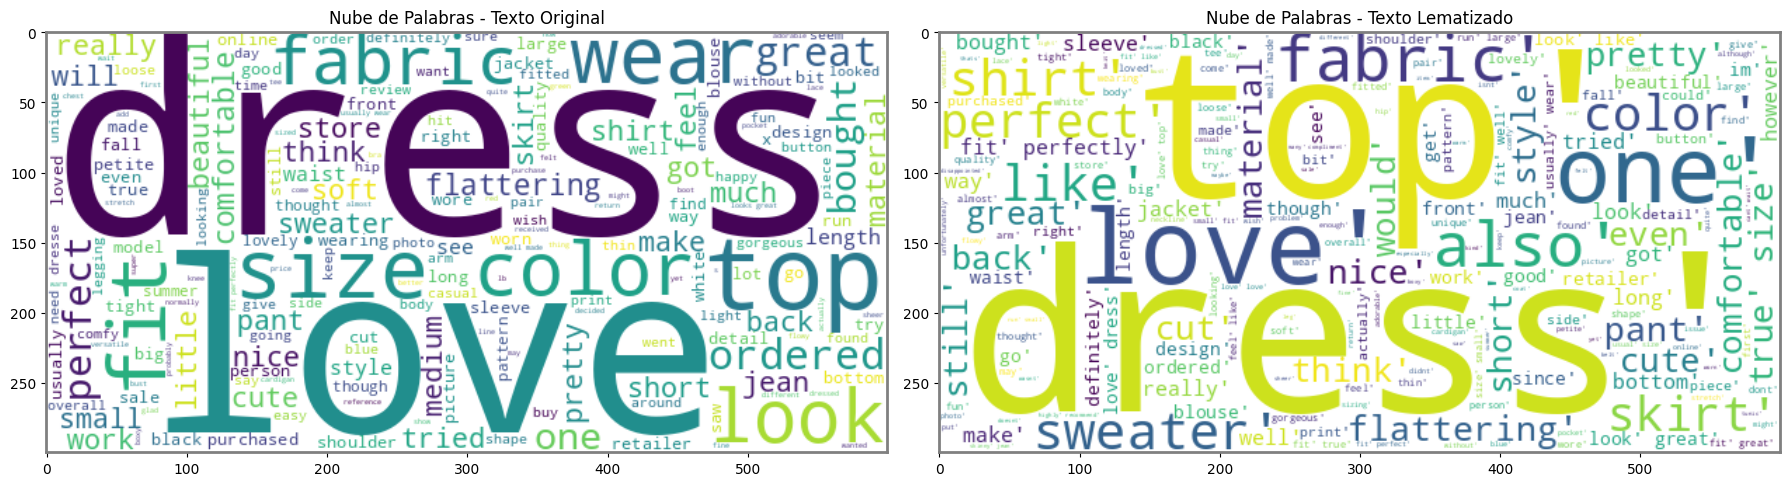

In [26]:
# Se crean subplots de 1 fila, 2 columnas
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

text_original = ' '.join(df['Review Text'].fillna('').astype(str))
wordcloud_original = WordCloud(width=600, height=300, background_color='white').generate(text_original)                             # Se crea la nube de palabras con el texto original
# Se grafica la nube de palabras original
axs[0].imshow(wordcloud_original, interpolation='bilinear')
axs[0].set_title('Nube de Palabras - Texto Original')
#axs[0].axis('off')
for spine in axs[0].spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(2)

text_lematizado = ' '.join(df['Review_lematizacion'].fillna('').astype(str))
wordcloud_lematizado = WordCloud(width=600, height=300, background_color='white', stopwords=stop_words).generate(text_lematizado)   # Se crea la nube de palabras con el texto lematizado sin stopwords
# Se grafica la nube de palabras lematizadas
axs[1].imshow(wordcloud_lematizado, interpolation='bilinear')
axs[1].set_title('Nube de Palabras - Texto Lematizado')
#axs[1].axis('off')
for spine in axs[1].spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(2)

plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.show()

Se agregan algunas palabras a las stopwords para limpiar la nube de palabras y se vuelve a graficar.

In [27]:
stop_words.extend(['wear','would','one', 'dress', 'pant', 'skit', 'shirt', 'jacket', 'jean', 'sweater', 'legging', 'im']) # Agrega algunas palabras a las stopwords

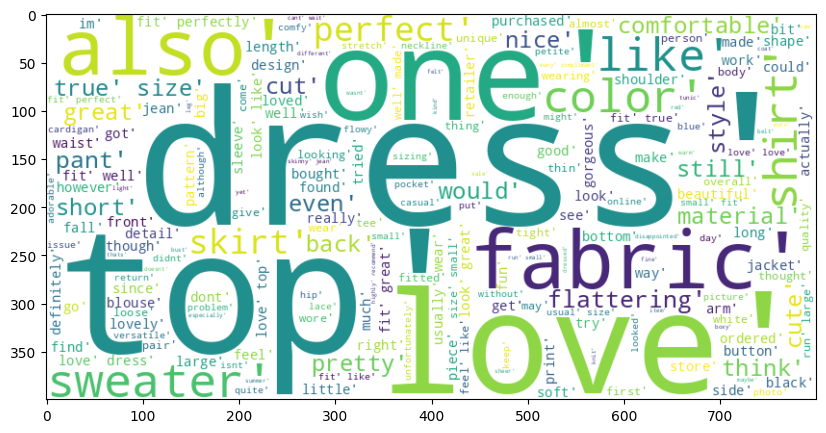

In [28]:
text_lematizado = ' '.join(df['Review_lematizacion'].fillna('').astype(str))  # Se crea una nueva wordcloud con el texto lematizado removiendo stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text_lematizado)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
spine.set_edgecolor('gray')
spine.set_linewidth(2)
plt.show()

Se generan nubes de palabras distintas según sea el sentimiento (Sentiment), positivo o negativo.

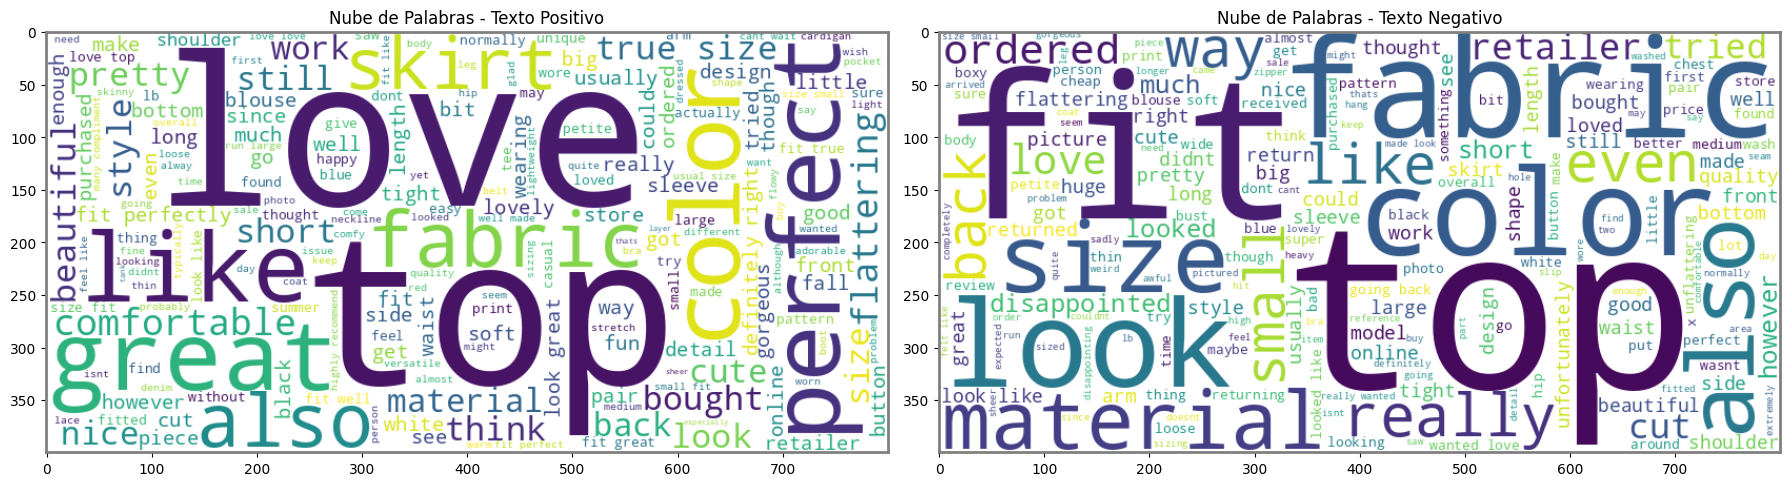

In [29]:
# Se crean subplots de 1 fila, 2 columnas
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

df['Review_lematizacion'] = df['Review_lematizacion'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Se grafica la nube de palabras con sentimientos positivos
df_positivo = df[df['Sentiment'] == 'Positivo']               # Se filtran las filas con sentimiento positivo del DataFrame
text_positivo = ' '.join(df_positivo['Review_lematizacion'])  # Se crea una nueva wordcloud con el texto lematizado
wordcloud_positivo = WordCloud(width=800, height=400, background_color='white',stopwords=stop_words).generate(text_positivo)
axs[0].imshow(wordcloud_positivo, interpolation='bilinear')
axs[0].set_title('Nube de Palabras - Texto Positivo')
for spine in axs[0].spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(2)

# Se grafica la nube de palabras con sentimientos negativos
df_negativo = df[df['Sentiment'] == 'Negativo']               # Se filtran las filas con sentimiento negativo del DataFrame
text_negativo = ' '.join(df_negativo['Review_lematizacion'])  # Se crea una nueva wordcloud con el texto lematizado
wordcloud_negativo = WordCloud(width=800, height=400, background_color='white',stopwords=stop_words).generate(text_negativo)
axs[1].imshow(wordcloud_negativo, interpolation='bilinear')
axs[1].set_title('Nube de Palabras - Texto Negativo')
#axs[1].axis('off')
for spine in axs[1].spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(2)

plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.show()

**BAG OF WORDS (BOW)**

A continuación se crean nubes de palabras en contexto positivo y negativo con n-gramas para captar contexto y matices que no se verían con palabras individuales.

Para esto se utiliza una instancia de CountVectorizer (que convierte una colección de textos en una matriz de recuentos de términos) y luego ajustamos esta instancia (mediante fit_transform) al texto de cada reseña. Esto construye el vocabulario y transforma las reseñas en una matriz BoW (freqs).

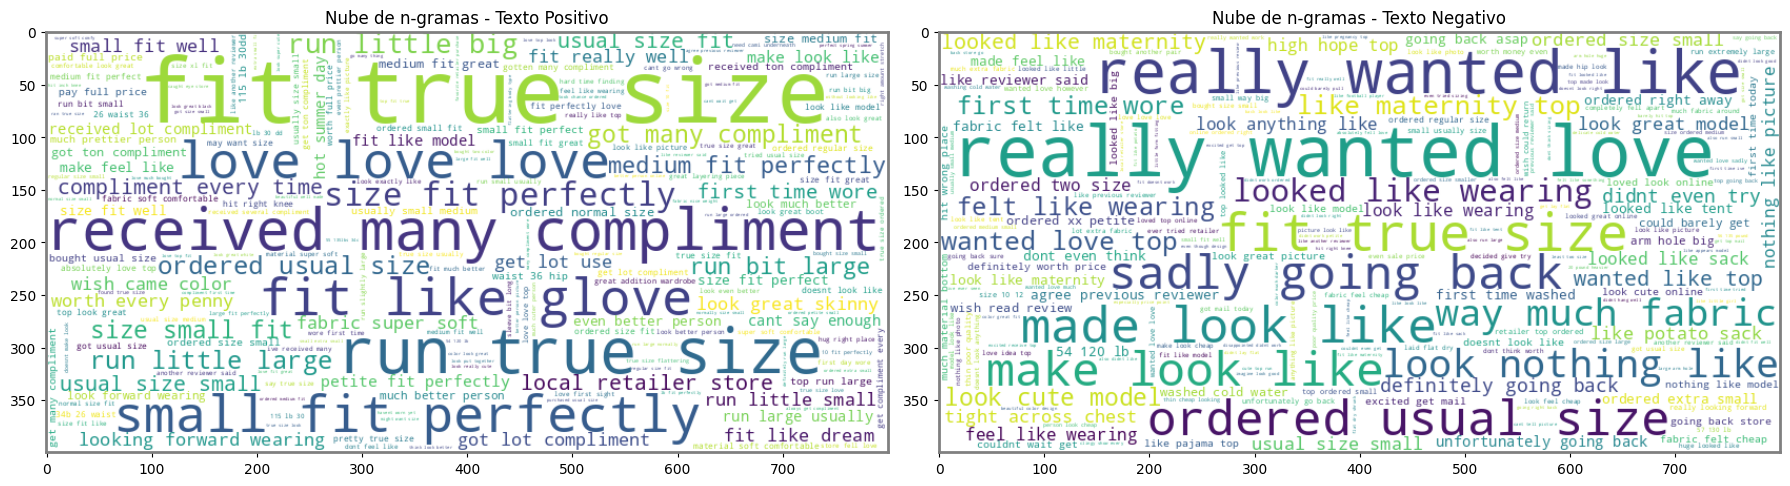

In [30]:
df['Review_lematizacion'] = df['Review_lematizacion'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)  #Para convertir listas en strings si es necesario

# Función para generar n-gramas
def generate_ngrams(texts, n=3):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words=stop_words)           # Se crea el CountVectorizer con las stop_words definidas
    X = vectorizer.fit_transform(texts)                                               # Se transforma el texto en n-gramas
    freqs = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]))  # Se crea el diccionario con los n-gramas y sus frecuencias
    return freqs                                                                      # Se devuelve la matriz BOW (el diccionario con los n-gramas y sus frecuencias)

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Nube de n-gramas para textos positivos
ngrams_positivo = generate_ngrams(df[df['Sentiment'] == 'Positivo']['Review_lematizacion'], n=3)
wordcloud_positivo = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ngrams_positivo)
axs[0].imshow(wordcloud_positivo, interpolation='bilinear')
axs[0].set_title('Nube de n-gramas - Texto Positivo')

# Nube de n-gramas para textos negativos
ngrams_negativo = generate_ngrams(df[df['Sentiment'] == 'Negativo']['Review_lematizacion'], n=3)
wordcloud_negativo = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ngrams_negativo)
axs[1].imshow(wordcloud_negativo, interpolation='bilinear')
axs[1].set_title('Nube de n-gramas - Texto Negativo')

# Estética
for ax in axs:
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(2)

plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.show()


💡 Las reseñas positivas están centradas en experiencias satisfactorias y elogios. No obstante, y como era de esperar, en las reseñas negativas hay una clara expresión de decepción ("really wanted like", "sadly going back") y se perciben problemas de expectativa vs. realidad ("look nothing like", "made look like").

### **◼️ ANÁLISIS DE SENTIMIENTOS**
----

Se evaluan las reseñas en cuanto a su polaridad y su subjetividad:
* La polaridad mide cuán positivo o negativo es el texto, en un rango de -1 (muy negativo) a 1 (muy positivo).
* La subjetividad mide cuánto del texto es opinión (1) versus hecho (0).

In [31]:
# Se crea una columna con objetos TextBlob sobre la que se hará el análisis de sentimiento
df['Blob'] = df['Review Text'].apply(TextBlob)

# Se extraen la polaridad y subjetividad del sentimiento
df['Sentiment_Polarity'] = df['Blob'].apply(lambda blob: blob.sentiment.polarity)
df['Sentiment_Subjectivity'] = df['Blob'].apply(lambda blob: blob.sentiment.subjectivity)
df[['Review Text', 'Sentiment_Polarity', 'Sentiment_Subjectivity']].head(10)

,Review Text,Sentiment_Polarity,Sentiment_Subjectivity
0,Absolutely wonderful - silky and sexy and comf...,0.633333,0.933333
1,Love this dress! it's sooo pretty. i happene...,0.339583,0.725000
3,"I love, love, love this jumpsuit. it's fun, fl...",0.550000,0.625000
4,This shirt is very flattering to all due to th...,0.512891,0.568750
5,"I love tracy reese dresses, but this one is no...",0.178750,0.533125
6,I aded this in my basket at hte last mintue to...,0.133750,0.607778
7,"I ordered this in carbon for store pick up, an...",0.171635,0.496154
8,I love this dress. i usually get an xs but it ...,0.002500,0.380000
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",0.204200,0.467257
11,This dress is perfection! so pretty and flatte...,0.250000,1.000000


In [32]:
sentiment_stats = df.groupby('Sentiment')[['Sentiment_Polarity', 'Sentiment_Subjectivity']].mean()  # Se agrupa por sentimiento y calculan promedios

print("Promedio de polaridad y subjetividad por tipo de sentimiento:")
print(sentiment_stats)

Promedio de polaridad y subjetividad por tipo de sentimiento:
           Sentiment_Polarity  Sentiment_Subjectivity
Sentiment                                            
Negativo             0.108145                0.532102
Positivo             0.282438                0.568374


💡 Los textos clasificados como positivos tienen una **polaridad** levemente mayor que los negativos. No obstante, los textos negativos no son extremadamente negativos (0.108), lo que podría indicar que las reseñas negativas, aunque críticas, no necesariamente usan lenguaje extremadamente negativo

Ambos tipos de reseñas tienen niveles similares de **subjetividad**, aunque las positivas son ligeramente más subjetivas. Esto sugiere que los usuarios tienden a expresar más emociones o juicios personales cuando están satisfechos.

<a id="1"></a>
# <div style="padding:20px;color:yellow;margin:0;font-size:30px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#333333;overflow:hidden"><b>MODELADO </b></div>

### **◼️ TF-IDF - Term Frequency-Inverse Document Frequency**
----

Para entender qué palabras tienen mayor peso dentro de las reseñas, se aplicó la técnica TF-IDF. Esta herramienta permite identificar qué términos son más representativos en los textos, destacando aquellos que aparecen con frecuencia en una reseña pero no en todas.

En este trabajo, se utilizó el vectorizador TF-IDF para transformar los textos en vectores numéricos, lo que facilita su análisis y comparación. Se aplicó por separado a los textos con sentimiento positivo y negativo, lo que permitió observar qué palabras son más relevantes en cada grupo. Este enfoque ayuda a detectar patrones lingüísticos asociados a cada tipo de experiencia del usuario.

A continuación se realiza un **modelo de clasificación** para predecir la valoración (positiva o negativa) de un cliente a partir de una reseña, usando **TF-IDF** para transformar el texto y **Regresión Logística** como algoritmo de aprendizaje.

Se considera la variable "Review Text" como variable independiente sobre la cual se harán las predicciones del "Rating".

**Entrenamiento del Modelo con el dataset original**

Se toma el set de datos original con Ratings del 1 al 5 (multiclase).

In [138]:
X_train, X_test, y_train, y_test = train_test_split(dfReviews['Review Text'], dfReviews['Rating'], test_size=0.2, random_state=42)  # Se dividen los datos en conjuntos de entrenamiento y prueba

# Vectorización TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)     # Se crea un vectorizador TF-IDF (el objeto del modelo o herramienta a usar)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)   # Se ajustan los datos de entrenamiento
X_test_tfidf = tfidf_vectorizer.transform(X_test)         # Se transforman los datos de prueba

# Escalado de los datos (para mejorar la estabilidad del entrenamiento)
#scaler = StandardScaler(with_mean=False)
#X_train_scaled = scaler.fit_transform(X_train_tfidf)
#X_test_scaled = scaler.transform(X_test_tfidf)

# Modelo de regresión logística
model = LogisticRegression(max_iter=1000)                 # Se instancia el modelo
model.fit(X_train_tfidf, y_train)                         # Se entrena el modelo (aprende) a partir de los datos de entrenamiento
y_pred = model.predict(X_test_tfidf)                      # Se hacen  predicciones en el conjunto de prueba
#y_pred = model.predict(X_test_scaled)                     # Se hacen  predicciones en el conjunto de prueba escalado

# Mostrar predicciones
print("Predicciones del modelo sobre el conjunto de prueba:")
print(y_pred)

Predicciones del modelo sobre el conjunto de prueba:
[5 4 3 ... 3 5 4]


**Evaluación del Modelo**

A continuación se evalúa el modelo a partir distintas métricas:

* **Accuracy:** Indica qué tan bien predice el modelo en datos nuevos (exactitud). Mide el porcentaje total de predicciones correctas sobre el total de casos. Es una medida global del desempeño.
* **Precision:** Indica qué proporción de las predicciones positivas realizadas por el modelo son realmente positivas. Cuántos falsos positivos se está evitando.
* **Recall:** Indica cuántos de los casos positivos reales fueron capturados por el modelo. Cuántos verdaderos positivos se está capturando.
* **f1 Score:** Calcula el promedio armónico entre precisión y recall. Un buen balance si ambas cosas son importantes. Es útil cuando hay cierto desequilibrio entre clases.
* **ROC AUC SCORE:** evalúa qué tan bien el modelo separa las clases. Un valor cercano a 1 indica una excelente discriminación entre "positivo" y "negativo".


In [139]:
# Se calculan las métricas del Modelo
accuracy_tfidf_M = accuracy_score(y_test, y_pred)
precision_tfidf_M = precision_score(y_test, y_pred, average='weighted')  # Calcula la métrica multiclase con average='weighted'
recall_tfidf_M = recall_score(y_test, y_pred, average='weighted') # Calcula la métrica multiclase con average='weighted'
f1_tfidf_M = f1_score(y_test, y_pred, average='weighted') # Calcula la métrica multiclase con average='weighted'
y_proba_tfidf_M = model.predict_proba(X_test_tfidf)
#y_proba_tfidf_M = model.predict_proba(X_test_scaled)
roc_auc_tfidf_M = roc_auc_score(y_test, y_proba_tfidf_M, multi_class='ovr', average='weighted') # Calcula la métrica multiclase con average='weighted'


# Se crea un diccionario para almacenar todas las métricas
metricas_modelos = {}

# Almaceno las métricas del modelo
metricas_modelos['RL_TFIDF_Multiclase'] = {
    'Accuracy': accuracy_tfidf_M,
    'Precision': precision_tfidf_M,
    'Recall': recall_tfidf_M,
    'F1 Score': f1_tfidf_M,
    'ROC AUC': roc_auc_tfidf_M
}

print("Métricas del Modelo con TF-IDF multiclase")
print(f"- Accuracy: {accuracy_tfidf_M:.3f}")
print(f"- Precisión: {precision_tfidf_M:.3f}")
print(f"- Recall: {recall_tfidf_M:.3f}")
print(f"- F1 Score: {f1_tfidf_M:.3f}")
print(f"- ROC AUC Score: {roc_auc_tfidf_M:.3f}")

# Reporte por clase
print("\n\nReporte de Clasificación por Clase:\n")
print(classification_report(y_test, y_pred))

Métricas del Modelo con TF-IDF multiclase
- Accuracy: 0.651
- Precisión: 0.608
- Recall: 0.651
- F1 Score: 0.618
- ROC AUC Score: 0.848


Reporte de Clasificación por Clase:

              precision    recall  f1-score   support

           1       0.42      0.12      0.19       148
           2       0.40      0.21      0.27       309
           3       0.44      0.40      0.42       588
           4       0.42      0.30      0.35       939
           5       0.75      0.92      0.83      2545

    accuracy                           0.65      4529
   macro avg       0.49      0.39      0.41      4529
weighted avg       0.61      0.65      0.62      4529



💡 De las métricas obtenidas podemos decir que:
* El modelo clasifica correctamente el 65.1% de los casos, lo cual indica un rendimiento aceptable considerando que se trata de una clasificación multiclase (ratings del 1 al 5).
* En promedio, cuando el modelo predice una clase, acierta el 60.8% de las veces. Esto sugiere que hay cierto nivel de confusión entre clases, quizás en las más cercanas (por ejemplo, entre 3 y 4).
* El modelo logra recuperar el 65.1% de los casos reales, lo que indica que está dejando algunos casos sin detectar.
* El equilibrio entre precisión y recall es razonable, aunque hay margen para mejorar la consistencia del modelo.
* El ROC AUC Score es relativamente alto, lo que indica que el modelo tiene buena capacidad para distinguir entre clases, especialmente entre las más extremas (ratings bajos vs. altos).

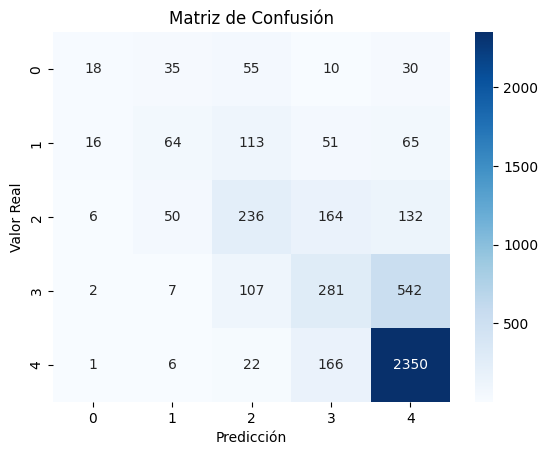

In [140]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

💡 La Matriz de Confusión indica que:
* La clase 5 (rating más alto) tiene la mayor cantidad de aciertos (2313), lo que sugiere que el modelo identifica bien las reseñas muy positivas.
* La clase 3 muestra una dispersión significativa, con muchos casos clasificados como 4 (561), lo que indica que el modelo tiene dificultades para distinguir entre reseñas neutras y ligeramente positivas.
* Las clases 1 y 2 tienen menos aciertos y más confusión entre sí y con clases superiores, lo que podría deberse a menor cantidad de ejemplos o menor diferenciación lingüística.

**Entrenamiento del Modelo con el dataset de clasificación binaria (positiva/negativa)**

In [141]:
df['SentimentValue'] = np.where(df['Sentiment'] == "Positivo", 1, 0)

X_train, X_test, y_train, y_test = train_test_split(df['Review Text'], df['SentimentValue'], test_size=0.2, random_state=42)  # Se dividen los datos en conjuntos de entrenamiento y prueba

# Vectorización TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)     # Se crea un vectorizador TF-IDF (el objeto del modelo o herramienta a usar)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)   # Se ajustan los datos de entrenamiento
X_test_tfidf = tfidf_vectorizer.transform(X_test)         # Se transforman los datos de prueba

# Escalado de los datos (para mejorar la estabilidad del entrenamiento)
#scaler = StandardScaler(with_mean=False)
#X_train_scaled = scaler.fit_transform(X_train_tfidf)
#X_test_scaled = scaler.transform(X_test_tfidf)

# Modelo de regresión logística
model = LogisticRegression(max_iter=1000)                 # Se instancia el modelo
model.fit(X_train_tfidf, y_train)                         # Se entrena el modelo (aprende) a partir de los datos de entrenamiento
y_pred = model.predict(X_test_tfidf)                      # Se hacen  predicciones en el conjunto de prueba
#y_pred = model.predict(X_test_scaled)                     # Se hacen  predicciones en el conjunto de prueba escalado

# Mostrar predicciones
print("Predicciones del modelo sobre el conjunto de prueba:")
print(y_pred)

Predicciones del modelo sobre el conjunto de prueba:
[1 0 1 ... 1 1 1]


**Evaluación del Modelo**

In [142]:
# Se calculan las métricas del Modelo
accuracy_tfidf_B = accuracy_score(y_test, y_pred)
precision_tfidf_B = precision_score(y_test, y_pred)
recall_tfidf_B = recall_score(y_test, y_pred)
f1_tfidf_B = f1_score(y_test, y_pred)
y_proba_tfidf_B = model.predict_proba(X_test_tfidf)[:, 1]   # Probabilidades para la clase positiva
#y_proba_tfidf_B = model.predict_proba(X_test_tfidf)
#y_proba_tfidf_B = model.predict_proba(X_test_scaled)
roc_auc_tfidf_B = roc_auc_score(y_test, y_proba_tfidf_B)

# Almaceno las métricas del modelo
metricas_modelos['RL_TFIDF_Binario'] = {
    'Accuracy': accuracy_tfidf_B,
    'Precision': precision_tfidf_B,
    'Recall': recall_tfidf_B,
    'F1 Score': f1_tfidf_B,
    'ROC AUC': roc_auc_tfidf_B
}

print("Métricas del Modelo con TF-IDF binario")
print(f"- Accuracy: {accuracy_tfidf_B:.3f}")
print(f"- Precisión: {precision_tfidf_B:.3f}")
print(f"- Recall: {recall_tfidf_B:.3f}")
print(f"- F1 Score: {f1_tfidf_B:.3f}")
print(f"- ROC AUC Score: {roc_auc_tfidf_B:.3f}")

# Reporte por clase
print("\n\nReporte de Clasificación por Clase:\n")
print(classification_report(y_test, y_pred))

Métricas del Modelo con TF-IDF binario
- Accuracy: 0.924
- Precisión: 0.931
- Recall: 0.987
- F1 Score: 0.958
- ROC AUC Score: 0.954


Reporte de Clasificación por Clase:

              precision    recall  f1-score   support

           0       0.83      0.46      0.60       478
           1       0.93      0.99      0.96      3486

    accuracy                           0.92      3964
   macro avg       0.88      0.73      0.78      3964
weighted avg       0.92      0.92      0.91      3964



💡 Como era de esperar, las métricas mejoran considerablemente:
* El modelo clasifica correctamente el 92.4% de los casos, lo cual indica un rendimiento superior.
* En promedio, cuando el modelo predice una clase, acierta el 93.1% de las veces (dado que no se contempla la clase 3-neutral).
* El modelo logra recuperar el 98.7% de los casos reales, lo que indica que casi no deja casos sin detectar.
* El equilibrio entre precisión y recall óptimo.
* El ROC AUC Score es alto, lo que indica que el modelo tiene buena capacidad para distinguir entre clases.

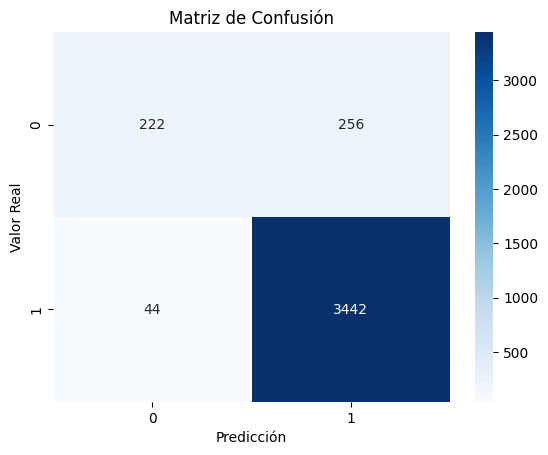

In [143]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

💡 Luego, el modelo tiene muy buen desempeño para la clase 1, con una alta cantidad de aciertos (3442) y pocos errores (44). Aunque para la clase 0 el rendimiento es más bajo: hay más errores (256) que aciertos (222), lo que indica que el modelo tiende a sobrepredecir la clase 1. Esto podría deberse a un desequilibrio en los datos, dado que la clase 1 es mucho más frecuente que la clase 0.

### **◼️ BOW - BAG OF WORDS**
----

Para abordar el problema de clasificación de reseñas según su calificación, se implementó un modelo de **Regresión Logística** utilizando la técnica **Bag Of Words (BoW)**. Este enfoque permite transformar el texto en una representación numérica basada en la frecuencia de aparición de cada palabra, sin considerar su orden ni contexto.

Una vez vectorizados los textos, se entrenó el modelo para predecir la variable Rating, permitiendo identificar patrones lingüísticos asociados a distintas valoraciones.

Este modelo sirve como punto de partida para evaluar cómo el contenido textual de las reseñas se relaciona con la percepción del usuario, y qué tan bien puede predecirse esa percepción a partir del lenguaje utilizado.

**Entrenamiento del Modelo con el dataset original**

Se toma el set de datos original con Ratings del 1 al 5 (multiclase).

In [144]:
# Se separan la variable dependiente (Review Text) y objetivo (Rating)
X = dfReviews['Review Text']
y = dfReviews['Rating']

# Se divide el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

vectorizador_bow = CountVectorizer()                    # Se inicializa el CountVectorizer (BoW)
X_train_bow = vectorizador_bow.fit_transform(X_train)   # Se ajustan las reseñas de entrenamiento

X_train_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 678966 stored elements and shape (15848, 12200)>

In [145]:
X_test_bow = vectorizador_bow.transform(X_test)         # Se transforman las reseñas de prueba

print("Vocabulario BoW:", vectorizador_bow.get_feature_names_out())
print("Matriz BoW de entrenamiento:\n", X_train_bow.toarray())

Vocabulario BoW: ['00' '000' '00p' ... 'zooming' 'zuma' 'â¼ber']
Matriz BoW de entrenamiento:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [146]:
# Se entrena el modelo de Regresión Logística con Bag of Words
modelo_bow = LogisticRegression(max_iter=1000)
modelo_bow.fit(X_train_bow, y_train)

LogisticRegression(max_iter=1000)

In [147]:
# Se hacen predicciones en el conjunto de prueba
y_pred_bow = modelo_bow.predict(X_test_bow)

In [148]:
# Se calculan las métricas del modelo
accuracy_bow_M = accuracy_score(y_test, y_pred_bow)
precision_bow_M = precision_score(y_test, y_pred_bow, average='weighted')   # Calcula la métrica multiclase con average='weighted'
recall_bow_M = recall_score(y_test, y_pred_bow, average='weighted')         # Calcula la métrica multiclase con average='weighted'
f1_bow_M = f1_score(y_test, y_pred_bow, average='weighted')                 # Calcula la métrica multiclase con average='weighted'
#y_proba_M = modelo_bow.predict_proba(X_test_tfidf)[:, 1]                    # Probabilidades para la clase positiva
#y_proba_M = modelo_bow.predict_proba(X_test_scaled)
y_proba_bow_M = modelo_bow.predict_proba(X_test_bow)
roc_auc_bow_M = roc_auc_score(y_test, y_proba_bow_M, multi_class='ovr', average='weighted') # Calcula la métrica multiclase con average='weighted'

# Almaceno las métricas del modelo
metricas_modelos['RL_BOW_Multiclase'] = {
    'Accuracy': accuracy_bow_M,
    'Precision': precision_bow_M,
    'Recall': recall_bow_M,
    'F1 Score': f1_bow_M,
    'ROC AUC': roc_auc_bow_M
}

print("Métricas del Modelo con Bag of Words (BoW) multiclase")
print(f"- Accuracy: {accuracy_bow_M:.3f}")
print(f"- Precisión: {precision_bow_M:.3f}")
print(f"- Recall: {recall_bow_M:.3f}")
print(f"- F1 Score: {f1_bow_M:.3f}")
print(f"- ROC AUC Score: {roc_auc_bow_M:.3f}")

# Reporte por clase
print("\n\nReporte de Clasificación por Clase:\n")
print(classification_report(y_test, y_pred_bow))

Métricas del Modelo con Bag of Words (BoW) multiclase
- Accuracy: 0.619
- Precisión: 0.597
- Recall: 0.619
- F1 Score: 0.606
- ROC AUC Score: 0.812


Reporte de Clasificación por Clase:

              precision    recall  f1-score   support

           1       0.30      0.26      0.28       227
           2       0.29      0.27      0.28       462
           3       0.41      0.35      0.38       874
           4       0.38      0.33      0.35      1438
           5       0.78      0.85      0.81      3792

    accuracy                           0.62      6793
   macro avg       0.43      0.41      0.42      6793
weighted avg       0.60      0.62      0.61      6793



In [149]:
print("Clases en y:", y.unique())

Clases en y: [4 5 3 2 1]


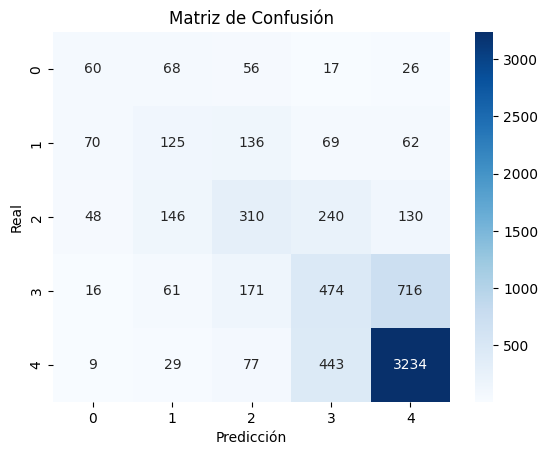

In [150]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_bow)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

**Entrenamiento del Modelo con el dataset de clasificación binaria (positiva/negativa)**

In [151]:
# Se separan la variable dependiente (Review Text) y objetivo (Rating)
X = df['Review Text']
y = df['SentimentValue']

# Se divide el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

vectorizador_bow = CountVectorizer()                    # Se inicializa el CountVectorizer (BoW)
X_train_bow = vectorizador_bow.fit_transform(X_train)   # Se ajustan las reseñas de entrenamiento

X_train_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 588470 stored elements and shape (13872, 11546)>

In [152]:
X_test_bow = vectorizador_bow.transform(X_test)         # Se transforman las reseñas de prueba

print("Vocabulario BoW:", vectorizador_bow.get_feature_names_out())
print("Matriz BoW de entrenamiento:\n", X_train_bow.toarray())

Vocabulario BoW: ['00' '00p' '03' ... 'zoom' 'zooming' 'â¼ber']
Matriz BoW de entrenamiento:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [153]:
# Se entrena el modelo de Regresión Logística con Bag of Words
modelo_bow = LogisticRegression(max_iter=1000)
modelo_bow.fit(X_train_bow, y_train)

LogisticRegression(max_iter=1000)

In [154]:
# Se hacen predicciones en el conjunto de prueba
y_pred_bow = modelo_bow.predict(X_test_bow)

In [155]:
# Se calculan las métricas del modelo
accuracy_bow_B = accuracy_score(y_test, y_pred_bow)
precision_bow_B = precision_score(y_test, y_pred_bow)
recall_bow_B = recall_score(y_test, y_pred_bow)
f1_bow_B = f1_score(y_test, y_pred_bow)
y_proba_bow_B = modelo_bow.predict_proba(X_test_bow)
roc_auc_bow_B = roc_auc_score(y_test, y_proba_bow_B[:, 1])   # Para calcular el ROC AUC en binaria, se usa solo la probabilidad de la clase positiva (1)

# Almaceno las métricas del modelo
metricas_modelos['RL_BOW_Binario'] = {
    'Accuracy': accuracy_bow_B,
    'Precision': precision_bow_B,
    'Recall': recall_bow_B,
    'F1 Score': f1_bow_B,
    'ROC AUC': roc_auc_bow_B
}

print("Métricas del Modelo con Bag of Words (BoW) en binaria:")
print(f"- Accuracy: {accuracy_bow_B:.3f}")
print(f"- Precisión: {precision_bow_B:.3f}")
print(f"- Recall: {recall_bow_B:.3f}")
print(f"- F1 Score: {f1_bow_B:.3f}")
print(f"- ROC AUC Score: {roc_auc_bow_B:.3f}")

# Reporte por clase
print("\n\nReporte de Clasificación por Clase:\n")
print(classification_report(y_test, y_pred_bow))

Métricas del Modelo con Bag of Words (BoW) en binaria:
- Accuracy: 0.929
- Precisión: 0.949
- Recall: 0.971
- F1 Score: 0.960
- ROC AUC Score: 0.943


Reporte de Clasificación por Clase:

              precision    recall  f1-score   support

           0       0.75      0.62      0.68       716
           1       0.95      0.97      0.96      5230

    accuracy                           0.93      5946
   macro avg       0.85      0.80      0.82      5946
weighted avg       0.92      0.93      0.93      5946



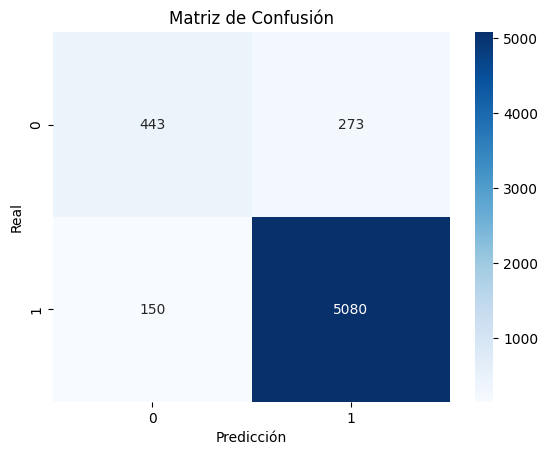

In [156]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_bow)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


In [157]:
# Inicializar el TfidfVectorizer
vectorizador_tfidf = TfidfVectorizer()

# Ajustar y transformar las reseñas de entrenamiento
X_train_tfidf = vectorizador_tfidf.fit_transform(X_train)

# Transformar las reseñas de prueba
X_test_tfidf = vectorizador_tfidf.transform(X_test)

print("Vocabulario TF-IDF:", vectorizador_tfidf.get_feature_names_out())
print("Matriz TF-IDF de entrenamiento:\n", X_train_tfidf.toarray())

Vocabulario TF-IDF: ['00' '00p' '03' ... 'zoom' 'zooming' 'â¼ber']
Matriz TF-IDF de entrenamiento:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [158]:
# Entrenar el modelo de Regresión Logística con TF-IDF
modelo_tfidf = LogisticRegression()
modelo_tfidf.fit(X_train_tfidf, y_train)

LogisticRegression()

In [159]:
# Hacer predicciones en el conjunto de prueba
y_pred_tfidf = modelo_tfidf.predict(X_test_tfidf)

# Calcular la precisión del modelo
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print("Precisión usando TF-IDF:", accuracy_tfidf)

Precisión usando TF-IDF: 0.9229734275142953


In [ ]:
# Función para predecir una nueva reseña
def predecir_reseña(nueva_reseña, modelo_bow, modelo_tfidf, vectorizador_bow, vectorizador_tfidf):
    # Preprocesar la nueva reseña
    nueva_reseña_bow = vectorizador_bow.transform([nueva_reseña])
    nueva_reseña_tfidf = vectorizador_tfidf.transform([nueva_reseña])

    # Predicción usando Bag of Words
    prediccion_bow = modelo_bow.predict(nueva_reseña_bow)
    # Predicción usando TF-IDF
    prediccion_tfidf = modelo_tfidf.predict(nueva_reseña_tfidf)

    # Mostrar resultados
    print(f"Reseña ingresada: {nueva_reseña}")
    print(f"Predicción con Bag of Words: {'Positiva' if prediccion_bow[0] == 1 else 'Negativa'}")
    print(f"Predicción con TF-IDF: {'Positiva' if prediccion_tfidf[0] == 1 else 'Negativa'}")


# Simular ingreso de nueva reseña por el usuario
nueva_reseña = input("Ingresa una reseña de película: ")
predecir_reseña(nueva_reseña, modelo_bow, modelo_tfidf, vectorizador_bow, vectorizador_tfidf)

<a id="1" href="#introduccion"></a>
# <div style="padding:20px;color:yellow;margin:0;font-size:30px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#333333;overflow:hidden"><b>🔲 CONCLUSIÓN </b></div>